Header

In [1]:
from copy import error
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['xtick.color'] = 'black'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['lines.color'] = 'black'
mpl.rcParams['savefig.facecolor'] = 'white'
mpl.rcParams['savefig.edgecolor'] = 'black'
mpl.rcParams['grid.color'] = 'silver'
mpl.rcParams['hatch.color']='black'
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.labelcolor']='black'
mpl.rcParams['text.color']='black'
import numpy as np
from scipy.stats import norm
import statistics
# Hotkeys
# Ctrl + K + C : Comment out the selected code.
# Ctrl + K + U : Uncomment the selected code.
# Ctrl + / : Toggle line comments.

Inserting data (manually)

In [2]:
X=np.array([-2.0,0,1.1,1.6,3.1,4.1,4.8,5.2,5.5,7,8,9,9.5,10.2,0.6,9.1,2,2.4,-1.8,-1.4,-0.7,10.1,15.5,13.2,11.2,16,10.5,12.7,14.8,2.6,3.5,-1.6,7.2,7.3,7.4,-3.1,-2.3,-0.8,-0.2,1.8,2.1,2.9,4.0,5.7,6.0,6.3,6.9,8.1,8.2,14])
Y=np.array([-1.1,2,0,1.9,2.8,3.2,4.8,7.1,7.5,6.6,10.3,11.1,8,9.7,1.2,10.0,-5.1,-1.6,-9.0,-7.3,-3.8,8.0,16.2,13,10.3,15.3,12.5,11.8,12.5,1.2,1.9,2,7.2,6.9,6.5,-3.0,-2.0,0.5,0.1,1.5,2.1,2.8,3.7,5.5,6.4,6.2,7.0,8.0,7.5,13.5])

In [205]:
MaxX=max(X); MinX=min(X)
def P_n(x,k): #k: degree of polynomial
  P=np.zeros(k+1)
  for i in range(0,k+1):
    if i==0:
      P[k-i]=1
    else:
      P[k-i]=x**i
  return P #Vector of coefficents [x**k,x**(k-1),...,x,1]

def f(x): #d<=n
  # return np.array([x,1])
  # return np.array([x**18,x**16,x**15,x**14,x**12,x**10,x**9,x**8,x**7,x**6,x**5,x**4,x**3,x**2,x,1])
  # return np.array([x**18,x**17,x**16,x**15,x**14,x**13,x**12,x**11,x**10,x**9,x**8,x**7,x**6,x**5,x**4,x**3,x**2,x,1])
  return np.array([x**5,x**4,x**3,x**2,x,1])
  
smooth=250 #Check GraphPrediction parameters
l=10 #Ridge penalty (l=0 is equivalent to OLS)

Principles for regression

In [19]:
def Phi(X,f):
  n=len(X); d=len(f(1))
  phi=np.zeros((n,d))
  for i in range(0,n):
    varphi_iT=f(X[i])
    for j in range(0,d):
      phi[i][j]=varphi_iT[j]
  return phi

def Estimator(X,Y,f,l):
  phi=Phi(X,f); n=len(Y); d=len(phi[0,:])
  phiT=np.transpose(phi)
  return np.linalg.solve(phiT@phi+n*l*np.identity(d),phiT@Y)

def Prediction(w,X,Y,f,l):
  theta=Estimator(X,Y,f,l)
  return f(w)@theta

def GraphPrediction(X,Y,f,l,Inf,Sup,smooth,color,label):
  n=len(X);  AxisX=np.linspace(Inf,Sup,num=smooth);  AxisY=np.linspace(Inf,Sup,num=smooth)
  for i in range(0,smooth):
    AxisY[i]=Prediction(AxisX[i],X,Y,f,l)
  return plt.plot(AxisX,AxisY,color,label=label)

def EstimationError(X,Y,f,l):
  n=len(X);  error=np.zeros(n)
  for i in range(0,n):
    # print(Y[i]); print(f'x{Prediction(X[i],X,Y,l)}')
    error[i]=Y[i]-Prediction(X[i],X,Y,f,l)
  return error

Vector and matrix counter

In [5]:
def PrintVector(v):
  n=len(v)
  for i in range(0,n):
    print(f'{v[i]}',end='\t')
  print('')
  
def PrintVectorH(v):
  n=len(v)
  for i in range(0,n):
    print(f'{v[i]}',end='\t')
  print('')

def PrimitivePrintTable(X,Y,f,l):
  error=EstimationError(X,Y,f,l)
  hatY=np.zeros(len(X))
  for i in range(0,len(X)):
    hatY[i]=Prediction(X[i],X,Y,f,l)
  print('———————————————————————————————————————————————————————————')
  print('X \t Y \t hat(Y) \t Error')
  print('———————————————————————————————————————————————————————————')
  for i in range(0,len(X)):
    print(f'{X[i]} \t {Y[i]} \t {round(hatY[i],5)} \t {round(error[i],5)}')
  print('———————————————————————————————————————————————————————————')

def PrintTable(X,Y,f,l):
  error=EstimationError(X,Y,f,l)
  hatY=np.zeros(len(X))
  for i in range(0,len(X)):
    hatY[i]=Prediction(X[i],X,Y,f,l)
  Data=np.array([X,Y,hatY,error])
  Data=np.transpose(Data)
  AuxData=np.zeros((len(Data[:,0])*len(Data[0,:]),2)) #Starts the algorithm
  for i in range(0,len(Data[:,0])):
    for j in range(0,len(Data[0,:])):
      AuxData[i*len(Data[0,:])+j,0]=Data[i,j]
      AuxData[i*len(Data[0,:])+j,1]=i #useless?
  DataX=Data[:,0]
  DataX=np.sort(DataX)
  NewData=Data
  NewData[:,0]=DataX
  for i in range(0,len(NewData[:,0])):
    for k in range(0,len(NewData[:,0])):
      if NewData[i,0]==AuxData[k*len(Data[0,:]),0]:
        for j in range(0,len(NewData[0,:])):
          NewData[i,j]=AuxData[k*len(Data[0,:])+j,0]
  Data=NewData
  print('———————————————————————————————————————————————————————————')
  print('X \t Y \t hat(Y) \t Error')
  print('———————————————————————————————————————————————————————————')
  for i in range(0,len(X)):
    print(f'{Data[i][0]} \t {Data[i][1]} \t {round(Data[i][2],5)} \t {round(Data[i][3],5)}')
  print('———————————————————————————————————————————————————————————')
  
def GetVectorFromIndexes(v,index_vector):
  n=len(index_vector)
  vector=np.zeros(n)
  for i in range(0,n):
    vector[i]=v[int(index_vector[i])]
  return vector

def GetVectorComplement(v,index_vector):
  L=len(v); n=len(index_vector)
  index_vector_complement=np.zeros(L)
  for j in range(0,L):
    index_vector_complement[j]=j
  for j in range(0,n):
    index_vector_complement=np.delete(index_vector_complement,np.where(index_vector_complement==index_vector[j]))
  return index_vector_complement

def SwapVectors(u,v): #Swap vectors
  aux=u; u=v; v=aux; return u,v

In [6]:
def MSE(X,Y,f,l):
  n=len(X)
  theta_l=Estimator(X,Y,f,l)
  phi=Phi(X,f)
  return 1/n*np.linalg.norm(Y-phi@theta_l)**2

def GraphMSE(X,Y,f,l_min,l_max,smooth,color,label):
  l=np.linspace(l_min,l_max,num=smooth)
  M=np.zeros(smooth)
  for i in range(0,smooth):
    M[i]=MSE(X,Y,f,l[i])
  plt.plot(l, M,color,label=label)
  plt.legend(loc="upper left");  plt.grid();  plt.show()

Graphing error probability distribution

In [7]:
def GraphErrorDistributionAsDiscrete(X,Y,f,l,n_part,smooth,x_min,x_max):
  error=EstimationError(X,Y,f,l); n=len(error)
  F_error=np.zeros(n_part)
  Error=np.linspace(min(error),max(error),n_part)
  mean=np.mean(error); std=np.std(error)
  error=np.sort(error);  delta=(error[n-1]-error[0])/(n_part-1)
  for i in range(0,n_part):
    if i==0:
      F_error[i]=0
    else:
      c=0
      for j in range(0,n):
        if error[j]<=error[0]+i*delta:
          c=c+1
      F_error[i]=c/n
  error_x=np.zeros(n_part-1)
  for i in range(0,n_part-1):
    error_x[i]=(Error[i+1]+Error[i])/2.0
  P_error=np.zeros(n_part-1)
  for i in range(0,n_part-1):
    P_error[i]=(F_error[i+1]-F_error[i])
  x_axis=np.linspace(x_min,x_max,smooth)
  print('-------------------------------------------------------')
  print(f'Distribución acumulada del error:')
  plt.plot(Error, F_error,'o',color='magenta',label= 'Error')
  plt.plot(x_axis, norm.cdf(x_axis, mean, std),label=f's={round(std,2)}')
  plt.legend(loc="upper left");  plt.grid();  plt.show()
  # print(error_x); print(P_error)
  print('-------------------------------------------------------')
  print(f'Probabilidad del error:')
  plt.plot(error_x, P_error,'o',color='magenta',label='Error')
  plt.plot(x_axis, norm.pdf(x_axis, mean, std),label=f's={round(std,2)}')
  plt.legend(loc="upper left");  plt.grid();  plt.show()
  print(f'Media: {mean}')
  print(f'Desviación: {std}')
  
def GraphErrorDistributionAsContinuous(X,Y,f,l,n_part,smooth,x_min,x_max):
  error=EstimationError(X,Y,f,l); n=len(error)
  F_error=np.zeros(n_part);  P_error=np.zeros(n_part)
  Error=np.linspace(min(error),max(error),n_part)
  mean=np.mean(error); std=np.std(error); error=np.sort(error)
  delta=(error[n-1]-error[0])/(n_part-1)
  for i in range(0,n_part):
    if i==0:
      F_error[i]=0
    else:
      c=0
      for j in range(0,n):
        if error[j]<=error[0]+i*delta:
          c=c+1
      F_error[i]=c/n
  k=0; c=0
  for i in range(0,n_part-1):
    # print(i,F_error[i+1],F_error[i],c); print('i')
    if F_error[i+1] != F_error[i]:
      if i+c+1>=n_part:
        break
      else:
        for j in range(i,i+c+1):
          # print(k,error[k],error[k+1],c)
          P_error[j]=(F_error[i+1]-F_error[i])/(error[k+1]-error[k])
        c=0
        k=k+1
        # print('')
    else:
      c=c+1
  x_axis=np.linspace(x_min,x_max,smooth)
  print('-------------------------------------------------------')
  print(f'Distribución acumulada del error:')
  plt.plot(Error, F_error,color='magenta',label= 'Error')
  plt.plot(x_axis, norm.cdf(x_axis, mean, std),label=f's={round(std,2)}')
  plt.legend(loc="upper left")
  plt.grid()
  plt.show()
  # print(error_x); print(P_error)
  print('-------------------------------------------------------')
  print(f'Probabilidad del error:')
  plt.plot(Error, P_error,'o',color='magenta',label='Error')
  plt.plot(x_axis, norm.pdf(x_axis, mean, std),label=f's={round(std,2)}')
  plt.legend(loc="upper left")
  plt.grid()
  plt.show()
  print(f'Media: {mean}')
  print(f'Desviación: {std}')

def GraphMSE_per_P_n(X,Y,l,k_min,k_max):
  k=np.linspace(k_min,k_max,num=k_max-k_min+1)
  MSE_k=np.zeros(k_max-k_min+1)
  for i in range(0,k_max-k_min+1):
    def f(x):
      return P_n(x,i+k_min)
    MSE_k[i]=MSE(X,Y,f,l)
  plt.plot(k, MSE_k,'o',color='green',label='(k,MSE(P_k))')
  plt.plot(k, MSE_k,color='green',label='(k,MSE(P_k))')
  plt.legend(loc="upper right")
  plt.grid()
  plt.show()

In [202]:
def SimpleValidation(X,Y,f,l,E): #Para el costo norma 2
  E_c=GetVectorComplement(X,E)
  Xi=GetVectorFromIndexes(X,E) #Entrenamiento
  Yi=GetVectorFromIndexes(Y,E) #Entrenamiento
  Xi_complement=GetVectorFromIndexes(X,E_c) #Validacion
  Yi_complement=GetVectorFromIndexes(Y,E_c) #Validacion
  card=len(Xi)
  return 1/card*np.linalg.norm(Yi_complement-Phi(Xi_complement,f)@Estimator(Xi,Yi,f,l))**2

def PrintCrossValidationStats(X,Y,f,l,index_vector,index_vector_complement,i,Inf,Sup):
    # inicio = time.time()
    Xi=GetVectorFromIndexes(X,index_vector) #Entrenamiento
    Yi=GetVectorFromIndexes(Y,index_vector) #Entrenamiento
    Xi_complement=GetVectorFromIndexes(X,index_vector_complement) #Validacion
    Yi_complement=GetVectorFromIndexes(Y,index_vector_complement) #Validacion
    print('-------------------------------------------------------')
    print(f'-------------------PART {i+1} DATA-------------------')
    print('-------------------------------------------------------')
    print(f'El estimador Non-Pen (MSE{i+1}={round(MSE(Xi,Yi,f,0),5)}) es:')
    theta_i=Estimator(Xi,Yi,f,0)
    PrintVectorH(theta_i)
    print('-------------------------------------------------------')
    print(f'El estimador Ridge (l={l}) (MSE{i+1}={round(MSE(Xi,Yi,f,l),5)}) es:')
    theta_i_lambda=Estimator(Xi,Yi,f,l)
    PrintVectorH(theta_i_lambda)
    print('-------------------------------------------------------')
    print(f'La Validacion Cruzada Ridge (VAL{i+1}) es: {round(SimpleValidation(X,Y,f,l,index_vector),5)}')
    print('-------------------------------------------------------')
    print(f'-----------------GRAPHING PART {i+1} DATA-----------------')
    print('-------------------------------------------------------')
    # fin = time.time()
    # print(f'Tiempo de ejecución: {fin-inicio}')
    GraphPrediction(Xi,Yi,f,0,Inf,Sup,smooth,'red','Non-Pen') #Grafica del no penalizado (MCO)
    plt.plot(Xi, Yi,'o',color='green',label= 'Training')
    plt.plot(Xi_complement, Yi_complement,'o',color='blue',label= 'Test')
    plt.legend(loc="upper left")
    plt.grid()
    plt.show()

In [9]:
#######################################
#Printing CV vs Penalty
#######################################

def GraphCrossValVSPenalty(X,Y,f,l_min,l_max,l_step,S):
    print('')
    print('-------------------------------------------------------')
    print('--------------------GRAPHING l vs CV-------------------')
    print('-------------------------------------------------------')
    l=l_min
    l_axis_len=int((l_max-l_min)/l_step)+1
    l_axis=np.zeros(l_axis_len)
    CV_axis=np.zeros(l_axis_len); j=0
    while j<l_axis_len:
      l_axis[j]=l
      CV_Estimator=0
      for i in range(0,S):
          index_vector=np.array([0+i,S+i,2*S+i,3*S+i,4*S+i])
          index_vector_complement=GetVectorComplement(X,index_vector)
          index_vector,index_vector_complement=SwapVectors(index_vector,index_vector_complement)
          CV=SimpleValidation(X,Y,f,l,index_vector)
          CV_Estimator+=CV
      CV_axis[j]=CV_Estimator/S; j=j+1
      l=l+l_step
    # plt.plot(l_axis, CV_axis,'o',color='green')
    # PrintVectorH(l_axis)
    # PrintVectorH(CV_axis)
    plt.plot(l_axis, CV_axis,color='green',label= '$l$ vs $CV$')
    plt.legend(loc="upper left")
    plt.grid()
    plt.show()

Training entire data

In [10]:
print('-------------------------------------------------------')
print('----------------------FULL DATA-----------------------')
print('-------------------------------------------------------')
print(f'Los {len(X)} datos y las predicciones son:')
# PrintTable(X,Y,0)
PrintTable(X,Y,f,l)
# inicio = time.time()
print('-------------------------------------------------------')
print(f'El estimador Non-Pen (MSE={round(MSE(X,Y,f,0),5)}) es:')
# print(f'{Estimator(X,Y,f,l)}')
PrintVectorH(Estimator(X,Y,f,0))
print('-------------------------------------------------------')
print(f'El estimador Ridge (l={l}) (MSE={round(MSE(X,Y,f,l),5)}) es:')
# print(f'{Estimator(X,Y,f,l)}')
PrintVectorH(Estimator(X,Y,f,l))
print('-------------------------------------------------------')
# fin = time.time()
# print(f'Tiempo de ejecución: {fin-inicio}')

-------------------------------------------------------
----------------------FULL DATA-----------------------
-------------------------------------------------------
Los 50 datos y las predicciones son:
———————————————————————————————————————————————————————————
X 	 Y 	 hat(Y) 	 Error
———————————————————————————————————————————————————————————
-3.1 	 -3.0 	 -2.87904 	 -0.12096
-2.3 	 -2.0 	 -1.21075 	 -0.78925
-2.0 	 -1.1 	 -0.83158 	 -0.26842
-1.8 	 -9.0 	 -0.63559 	 -8.36441
-1.6 	 2.0 	 -0.47814 	 2.47814
-1.4 	 -7.3 	 -0.35373 	 -6.94627
-0.8 	 0.5 	 -0.12886 	 0.62886
-0.7 	 -3.8 	 -0.10707 	 -3.69293
-0.2 	 0.1 	 -0.0356 	 0.1356
0.0 	 2.0 	 -0.01646 	 2.01646
0.6 	 1.2 	 0.04679 	 1.15321
1.1 	 0.0 	 0.14099 	 -0.14099
1.6 	 1.9 	 0.30258 	 1.59742
1.8 	 1.5 	 0.3905 	 1.1095
2.0 	 -5.1 	 0.49308 	 -5.59308
2.1 	 2.1 	 0.55006 	 1.54994
2.4 	 -1.6 	 0.74448 	 -2.34448
2.6 	 1.2 	 0.894 	 0.306
2.9 	 2.8 	 1.14838 	 1.65162
3.1 	 2.8 	 1.33789 	 1.46211
3.5 	 1.9 	 1.76334 	 0.1

-------------------------------------------------------
------------------GRAPHING FULL DATA-------------------
-------------------------------------------------------


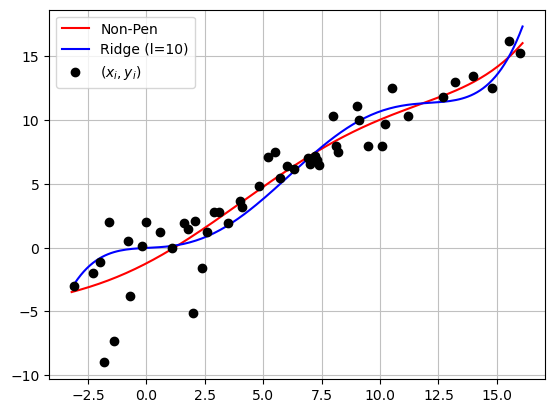

In [204]:
print('-------------------------------------------------------')
print('------------------GRAPHING FULL DATA-------------------')
print('-------------------------------------------------------')
Inf=MinX-0.1; Sup=MaxX+0.1
GraphPrediction(X,Y,f,0,Inf,Sup,smooth,'red','Non-Pen')
GraphPrediction(X,Y,f,l,Inf,Sup,smooth,'blue',f'Ridge (l={l})')
plt.plot(X, Y,'o',color='black',label= '$(x_i,y_i)$')
plt.legend(loc="upper left")
# plt.gca().set_aspect('equal')
plt.grid()
plt.show()

About error stats

In [12]:
error=EstimationError(X,Y,f,l)
error=np.sort(error)
print('——————————————')
print('Sorted error')
print('——————————————')
for i in range(0,len(X)):
  print(f'{round(error[i],5)}')
print('——————————————')

——————————————
Sorted error
——————————————
-8.36441
-6.94627
-5.59308
-3.69293
-2.75111
-2.34448
-2.31445
-1.57745
-1.39245
-1.24362
-1.11023
-0.90924
-0.78925
-0.75859
-0.68909
-0.63731
-0.51441
-0.26842
-0.23261
-0.14099
-0.12096
0.04699
0.05571
0.1356
0.13666
0.23735
0.306
0.36058
0.53894
0.62886
0.69053
0.93905
1.1095
1.15321
1.25798
1.27075
1.28224
1.32322
1.43501
1.4604
1.46211
1.5348
1.54994
1.59742
1.65162
1.67831
2.01646
2.47814
2.86892
2.95561
——————————————


-------------------------------------------------------
Distribución acumulada del error:


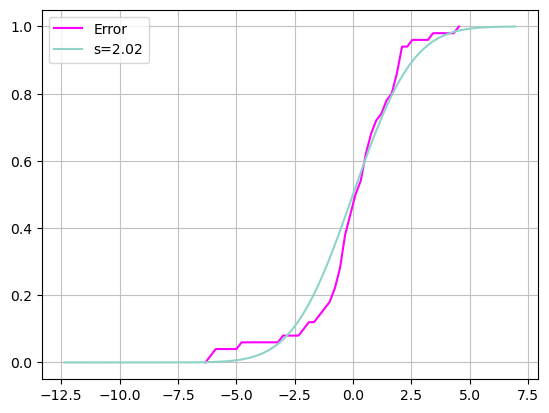

-------------------------------------------------------
Probabilidad del error:


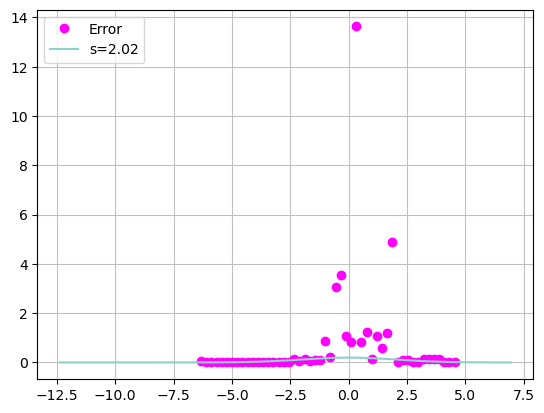

Media: -7.283063041541026e-16
Desviación: 2.0154810173005955
-------------------------------------------------------
Distribución acumulada del error:


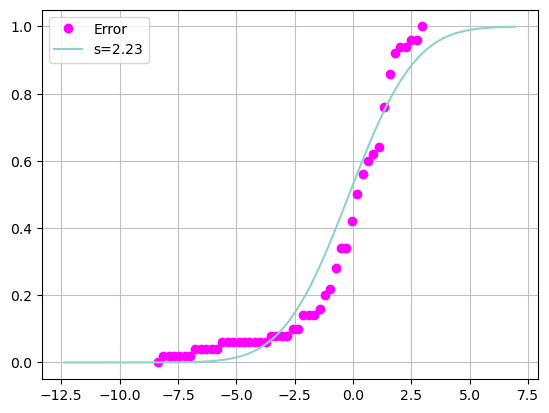

-------------------------------------------------------
Probabilidad del error:


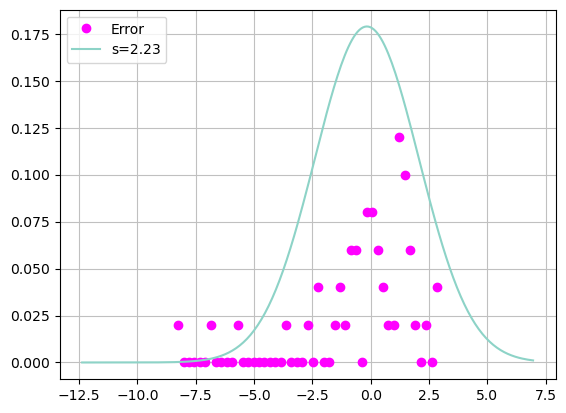

Media: -0.16458844696280053
Desviación: 2.2298753743263156


In [13]:
x_min=min(error)-4; x_max=max(error)+4
n_part=50
GraphErrorDistributionAsContinuous(X,Y,f,0,n_part,150,x_min,x_max)

GraphErrorDistributionAsDiscrete(X,Y,f,l,n_part,smooth,x_min,x_max)

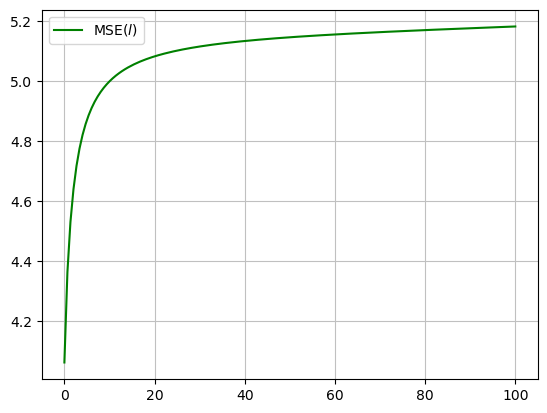

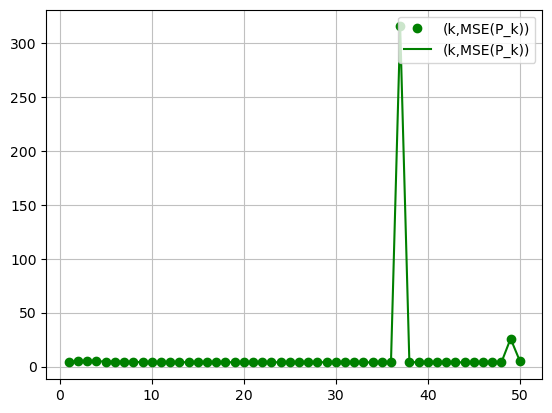

In [14]:
l_min=0; l_max=100; smooth=150
GraphMSE(X,Y,f,l_min,l_max,smooth,'green','MSE($l$)')

l_test=2; k_min=1; k_max=50
GraphMSE_per_P_n(X,Y,l_test,k_min,k_max)

Training K-Fold Data


-------------------------------------------------------
-----------------GRAPHING PARTIAL DATA-----------------
-------------------------------------------------------

-------------------------------------------------------
-------------------PART 1 DATA-------------------
-------------------------------------------------------
El estimador Non-Pen (MSE1=4.08225) es:
1.2460119677356413e-05	0.00026290950354408775	-0.015207309294677814	0.13040677185862323	1.0200384634809856	-1.89771050927966	
-------------------------------------------------------
El estimador Ridge (l=10) (MSE1=5.3511) es:
0.0002370780645220536	-0.007263362374906344	0.06020779886474806	-0.01464799424296839	0.09024388803708268	-0.026559321790023176	
-------------------------------------------------------
La Validacion Cruzada Ridge (VAL1) es: 0.20075
-------------------------------------------------------
-----------------GRAPHING PART 1 DATA-----------------
-------------------------------------------------------


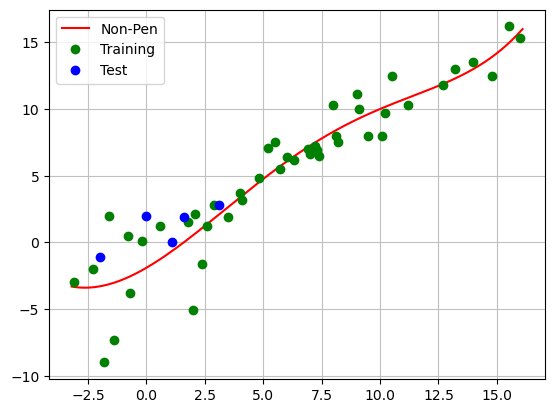



-------------------------------------------------------
-------------------PART 2 DATA-------------------
-------------------------------------------------------
El estimador Non-Pen (MSE2=4.28304) es:
5.5635379032892595e-05	-0.0014529715350150574	0.006773159197922568	0.04843670527289067	0.8561657674485824	-1.1472211070138532	
-------------------------------------------------------
El estimador Ridge (l=10) (MSE2=5.07248) es:
0.00022764395888578916	-0.007155464056213191	0.062224027157230126	-0.0362153711356341	0.07972122423938433	-0.020955909997679406	
-------------------------------------------------------
La Validacion Cruzada Ridge (VAL2) es: 0.55299
-------------------------------------------------------
-----------------GRAPHING PART 2 DATA-----------------
-------------------------------------------------------


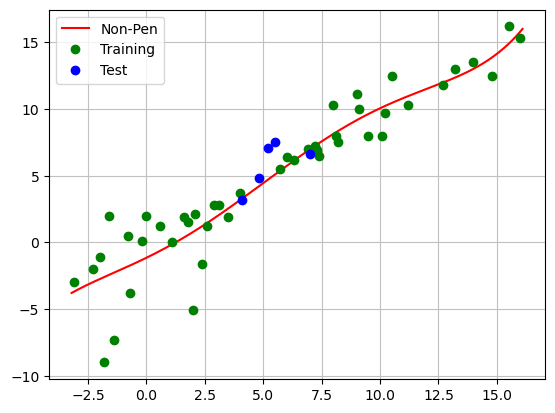



-------------------------------------------------------
-------------------PART 3 DATA-------------------
-------------------------------------------------------
El estimador Non-Pen (MSE3=4.19199) es:
1.536959495587058e-05	-1.1997942834844965e-05	-0.009220287635387913	0.09379164403236318	0.9718369933759594	-1.3866477950043592	
-------------------------------------------------------
El estimador Ridge (l=10) (MSE3=5.26238) es:
0.00023105993206664157	-0.007120739011677851	0.05940083601394399	-0.014535620538059214	0.09681394660558415	-0.020514180165123772	
-------------------------------------------------------
La Validacion Cruzada Ridge (VAL3) es: 0.28367
-------------------------------------------------------
-----------------GRAPHING PART 3 DATA-----------------
-------------------------------------------------------


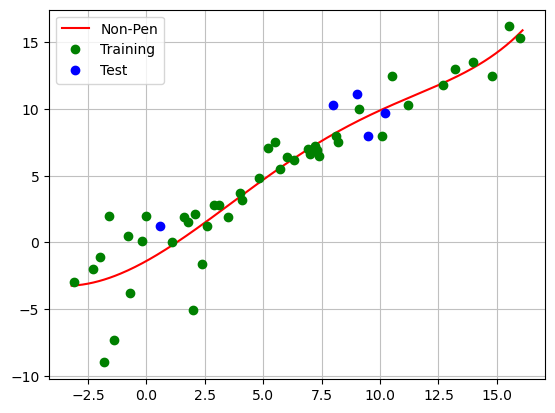



-------------------------------------------------------
-------------------PART 4 DATA-------------------
-------------------------------------------------------
El estimador Non-Pen (MSE4=1.47999) es:
7.429500024253691e-05	-0.0021679770016908243	0.016306672895716485	0.007843176817099385	0.6886604419878027	0.30681679983918003	
-------------------------------------------------------
El estimador Ridge (l=10) (MSE4=1.98835) es:
0.00019389791745732138	-0.005702141781623206	0.042024995969690664	0.05349179732857065	0.07962911676793583	0.02054786069849229	
-------------------------------------------------------
La Validacion Cruzada Ridge (VAL4) es: 3.71836
-------------------------------------------------------
-----------------GRAPHING PART 4 DATA-----------------
-------------------------------------------------------


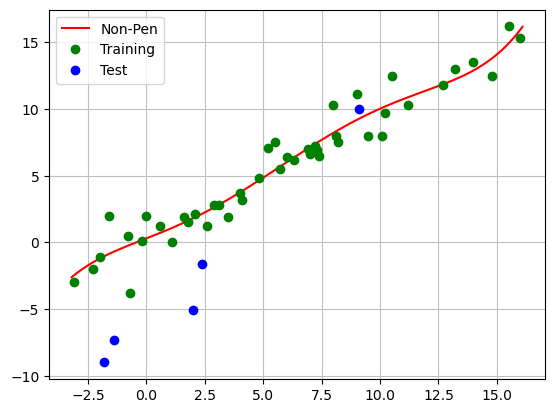



-------------------------------------------------------
-------------------PART 5 DATA-------------------
-------------------------------------------------------
El estimador Non-Pen (MSE5=4.22074) es:
6.75444848906709e-05	-0.0018904546692183133	0.011149468275291622	0.03837046255507509	0.8479874746130648	-0.9416308418154491	
-------------------------------------------------------
El estimador Ridge (l=10) (MSE5=4.94455) es:
0.00024092595230258522	-0.007457424197576465	0.06223432277001775	-0.01662056914224419	0.08718840775036739	-0.010940684846477615	
-------------------------------------------------------
La Validacion Cruzada Ridge (VAL5) es: 0.67064
-------------------------------------------------------
-----------------GRAPHING PART 5 DATA-----------------
-------------------------------------------------------


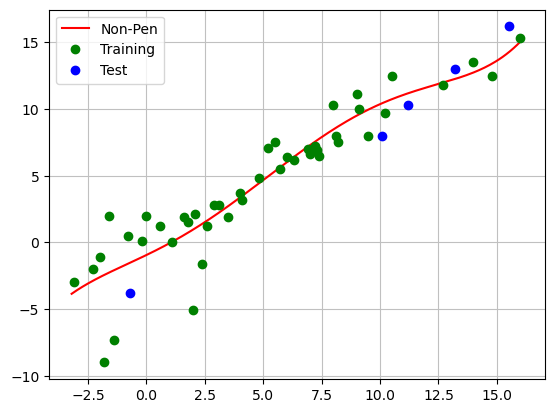



-------------------------------------------------------
-------------------PART 6 DATA-------------------
-------------------------------------------------------
El estimador Non-Pen (MSE6=4.29313) es:
5.068255716093307e-05	-0.0008653535069882971	-0.0033829358438597136	0.08327890907435673	0.9611771145307804	-1.23195026778023	
-------------------------------------------------------
El estimador Ridge (l=10) (MSE6=5.25538) es:
0.0002895736662667745	-0.008382824791864354	0.06543495744287403	-0.012013343112244987	0.08983513376900365	-0.019513715423125848	
-------------------------------------------------------
La Validacion Cruzada Ridge (VAL6) es: 0.81717
-------------------------------------------------------
-----------------GRAPHING PART 6 DATA-----------------
-------------------------------------------------------


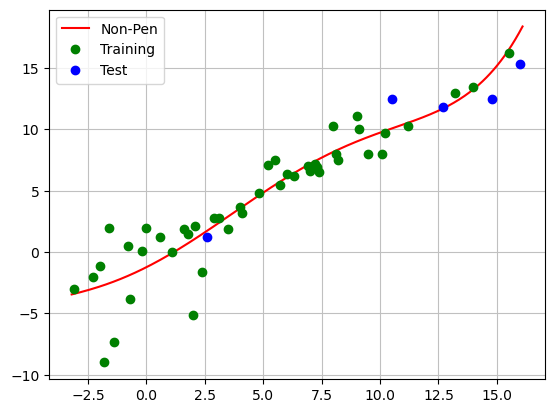



-------------------------------------------------------
-------------------PART 7 DATA-------------------
-------------------------------------------------------
El estimador Non-Pen (MSE7=3.92364) es:
7.093726975841619e-06	0.000352598399137806	-0.013801551178518561	0.09796251419000676	1.1423651080687336	-1.619805253390346	
-------------------------------------------------------
El estimador Ridge (l=10) (MSE7=5.32226) es:
0.00024769204478584	-0.00754890830292416	0.06213582375376522	-0.016468656602666595	0.1059717685523109	-0.02298125930075285	
-------------------------------------------------------
La Validacion Cruzada Ridge (VAL7) es: 0.20618
-------------------------------------------------------
-----------------GRAPHING PART 7 DATA-----------------
-------------------------------------------------------


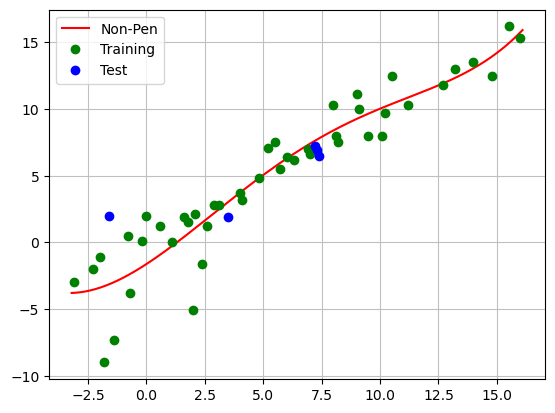



-------------------------------------------------------
-------------------PART 8 DATA-------------------
-------------------------------------------------------
El estimador Non-Pen (MSE8=4.19858) es:
4.421507682830535e-05	-0.0010140354536805174	0.0026372945092236516	0.03299321058107814	1.1478609283814143	-1.641010344781361	
-------------------------------------------------------
El estimador Ridge (l=10) (MSE8=5.4996) es:
0.00022760993321256545	-0.006927368465749907	0.056411108753654564	-0.0015336226741150818	0.09427001564546014	-0.02092971944161181	
-------------------------------------------------------
La Validacion Cruzada Ridge (VAL8) es: 0.05414
-------------------------------------------------------
-----------------GRAPHING PART 8 DATA-----------------
-------------------------------------------------------


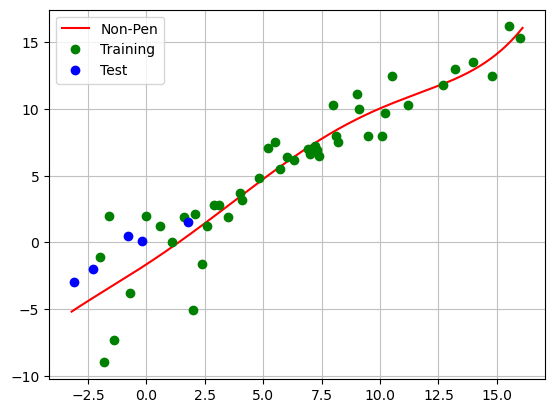



-------------------------------------------------------
-------------------PART 9 DATA-------------------
-------------------------------------------------------
El estimador Non-Pen (MSE9=4.46497) es:
4.785472476767191e-05	-0.001056295504478478	0.0005467903927525845	0.07729369603231412	0.8877882886065434	-1.2936295116838246	
-------------------------------------------------------
El estimador Ridge (l=10) (MSE9=5.36292) es:
0.00023636628576408683	-0.00732459456779034	0.06211649650120328	-0.026405353805121063	0.08170793941133714	-0.02405613482131663	
-------------------------------------------------------
La Validacion Cruzada Ridge (VAL9) es: 0.21598
-------------------------------------------------------
-----------------GRAPHING PART 9 DATA-----------------
-------------------------------------------------------


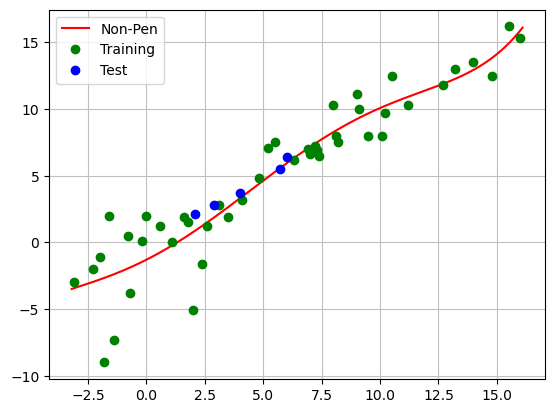



-------------------------------------------------------
-------------------PART 10 DATA-------------------
-------------------------------------------------------
El estimador Non-Pen (MSE10=4.47372) es:
5.438259624254468e-05	-0.0011943610639842802	0.0009561884386120288	0.07713304602632659	0.9196232496602129	-1.2257569874969376	
-------------------------------------------------------
El estimador Ridge (l=10) (MSE10=5.41781) es:
0.00025878010124284024	-0.007821760488054368	0.06347679805885145	-0.013033500871393893	0.09252209899765378	-0.01912743246086393	
-------------------------------------------------------
La Validacion Cruzada Ridge (VAL10) es: 0.15787
-------------------------------------------------------
-----------------GRAPHING PART 10 DATA-----------------
-------------------------------------------------------


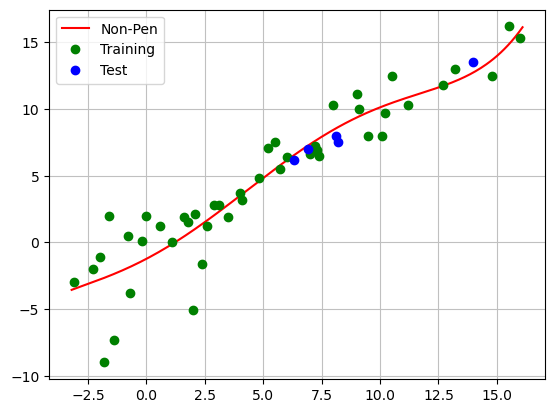



-------------------------------------------------------
El estimador de Validacion Cruzada Ridge (l=10) es: 0.68778
-------------------------------------------------------


In [ ]:
#######################################
#Selection of partitions
#######################################

print('')
print('-------------------------------------------------------')
print('-----------------GRAPHING PARTIAL DATA-----------------')
print('-------------------------------------------------------')
print('')
K_fold=10
CV_Estimator=0 #Validacion cruzada (promedio de las validaciones anteriores)
for i in range(0,K_fold): #10-fold
  # index_vector=np.array([0+i,10+i,20+i,30+i,40+i]) #Editable
  index_vector=np.array([5*i,5*i+1,5*i+2,5*i+3,5*i+4])
  index_vector_complement=GetVectorComplement(X,index_vector)
  index_vector,index_vector_complement=SwapVectors(index_vector,index_vector_complement)
  PrintCrossValidationStats(X,Y,f,l,index_vector,index_vector_complement,i,Inf,Sup) # Inf and sup are the limits on AxisX
  CV=SimpleValidation(X,Y,f,l,index_vector)
  CV_Estimator+=CV
  print(''); print('')
CV_Estimator=CV_Estimator/float(K_fold)
if l>0:
  print('-------------------------------------------------------')
  print(f'El estimador de Validacion Cruzada Ridge (l={l}) es: {round(CV_Estimator,5)}')
  print('-------------------------------------------------------')
else:
  print('-------------------------------------------------------')
  print(f'El estimador de Validacion Cruzada MCO es: {round(CV_Estimator,5)}')
  print('-------------------------------------------------------')


-------------------------------------------------------
--------------------GRAPHING l vs CV-------------------
-------------------------------------------------------


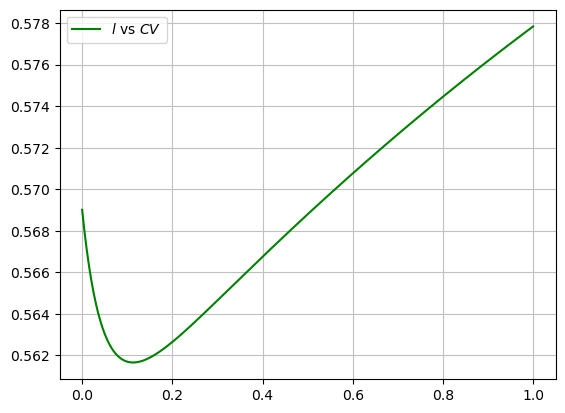

In [16]:
left_limit_graph=0
right_limit_graph=1
l_cv_delta=0.005
GraphCrossValVSPenalty(X,Y,f,left_limit_graph,right_limit_graph,l_cv_delta,K_fold)

Bias-Variance (Comparison) (Changing polynomial degree n)

In [244]:
# Necessary functions

def PhiPolynomial(X,d): #d: degree of polynomial, Phi is [n x (d+1)] dimensional
  n=len(X)
  phi=np.zeros((n,d+1))
  for i in range(0,n):
    for j in range(0,d+1):
      phi[i][j]=X[i]**(d-j)
  return phi

def HatSigma(A,n):
    return 1/n*(np.transpose(A)@A)
  
def RidgePolynomialBias_Variance(X,sigma,d,theta_ast,l): #(In-Data,pol degree, theorical estimator, ridge penalty)
  n=len(X)
  A=PhiPolynomial(X,d)
  hat_sigma=HatSigma(A,n)
  B=hat_sigma+l*np.identity(d+1)
  C=B@B
  C=np.linalg.inv(C)
  Bias=(l**2)*(theta_ast@C@hat_sigma@theta_ast)
  Variance=((sigma**2)/n)*np.trace(hat_sigma@hat_sigma@C)
  return Bias, Variance
  

In [261]:
deg=1
s=1
theta_ast=10*np.ones(deg+1)
RidgePolynomialBias_Variance(X,s,deg,theta_ast,1)

(19.527326685125807, 0.021313102038320687)

In [287]:
def GraphRidgePolynomialBiasVarianceFromKTo_N(X,sigma,K,N,l):
    AxisX=np.linspace(K,N,N-K+1); AxisYBias=np.zeros(N-K+1); AxisYVariance=np.zeros(N-K+1)
    for i in range(0,N-K+1):
        theta_ast=10*np.ones(i+K+1) #Subject to change before execute acording to the case
        B,V=RidgePolynomialBias_Variance(X,sigma,i+K,theta_ast,l)
        AxisYBias[i]=B; AxisYVariance[i]=V
    plt.plot(AxisX, AxisYBias,color='green',label= 'Bias')
    plt.plot(AxisX, AxisYVariance,color='orange',label= f'Variance (l={l})')
    plt.legend(loc="upper left")
    plt.grid()
    plt.show()

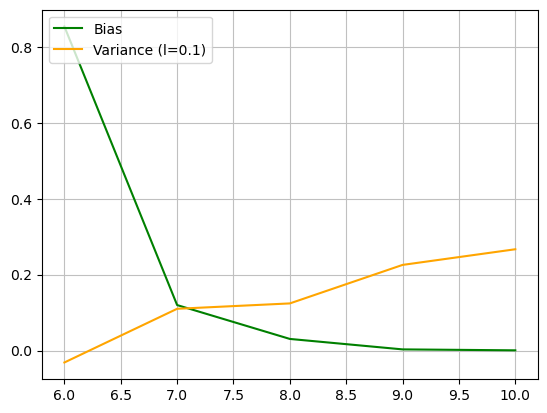

In [293]:
GraphRidgePolynomialBiasVarianceFromKTo_N(X,s,6,10,0.1)